In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data=raw_data.copy()
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data=data.drop(['Model'],axis=1)

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_nonan=data.dropna()

In [7]:
data_nonan.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [8]:
data_nonan.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


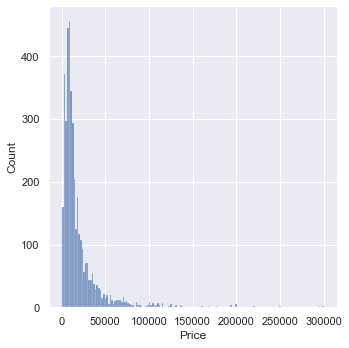

In [9]:
sns.displot(data_nonan['Price'])

In [10]:
q=data_nonan['Price'].quantile(0.99)
data1=data_nonan[data_nonan['Price']<q]

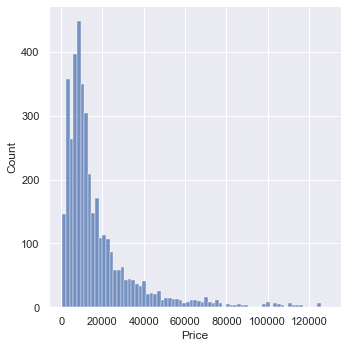

In [11]:
sns.displot(data1['Price'])

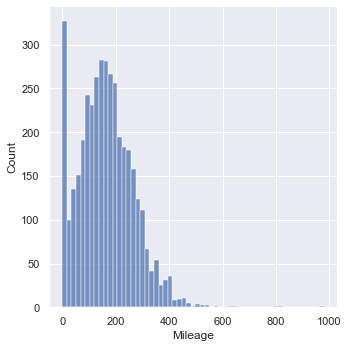

In [12]:
sns.displot(data1['Mileage'])

In [13]:
q=data1['Mileage'].quantile(0.99)
data2=data1[data1['Mileage']<q]

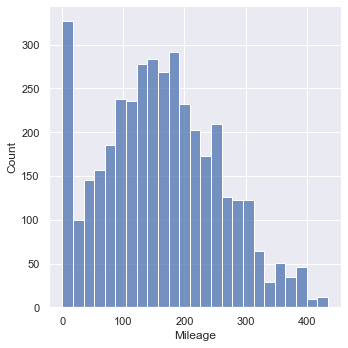

In [14]:
sns.displot(data2['Mileage'])

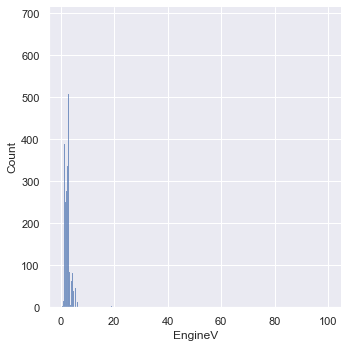

In [15]:
sns.displot(data2['EngineV'])

In [16]:
data3=data2[data2['EngineV']<6.5]

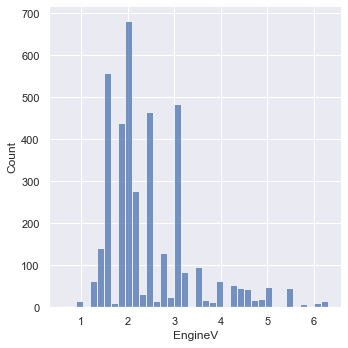

In [17]:
sns.displot(data3['EngineV'])

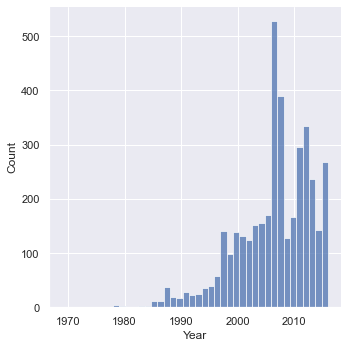

In [18]:
sns.displot(data3['Year'])

In [19]:
q=data3['Year'].quantile(0.01)
data4=data3[q<data3['Year']]

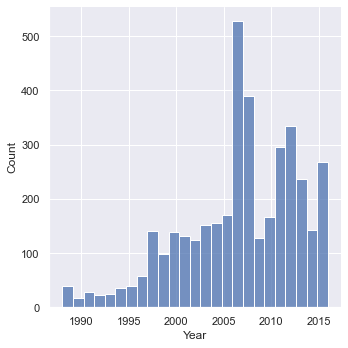

In [20]:
sns.displot(data4['Year'])

In [21]:
data_cleaned=data4.reset_index()

In [22]:
data_cleaned.describe()

,index,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,2172.327903,18194.455679,160.542539,2.450440,2006.709853
std,1257.285662,19085.855165,95.633291,0.949366,6.103870
min,0.000000,800.000000,0.000000,0.600000,1988.000000
25%,1078.500000,7200.000000,91.000000,1.800000,2003.000000
50%,2174.000000,11700.000000,157.000000,2.200000,2008.000000
75%,3269.500000,21700.000000,225.000000,3.000000,2012.000000
max,4344.000000,129222.000000,435.000000,6.300000,2016.000000


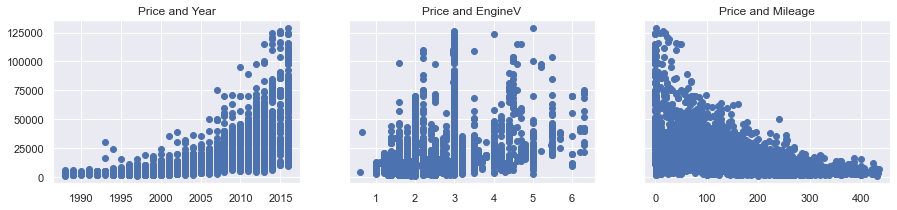

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [24]:
data_cleaned['log_price']=np.log(data_cleaned['Price'])
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [25]:
data_cleaned

,index,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,4338,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,4339,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,4341,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


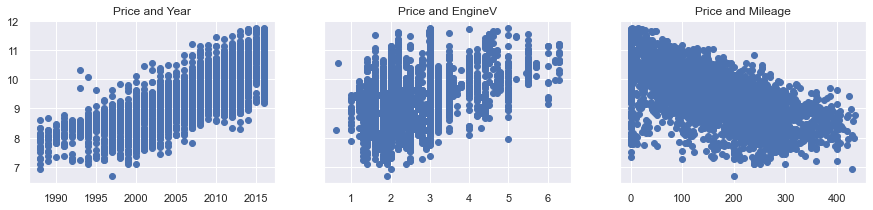

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')


plt.show()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables =data_cleaned[['Year','EngineV','Mileage']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [28]:
vif

,VIF,Features
0,10.354854,Year
1,7.662068,EngineV
2,3.791584,Mileage


In [29]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

In [30]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [31]:
data_with_dummies

,index,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,4338,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,4339,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,4340,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,4341,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [32]:
data_with_dummies.columns

Index(['index', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype='object')

In [33]:
col=['index', 'log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
data_with_dummies=data_with_dummies[col]

In [35]:
data_processed=data_with_dummies.reset_index(drop='True')

In [36]:
x=data_with_dummies.drop(['log_price'],axis=1)
y=data_with_dummies['log_price']

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
scaler.fit(x,y)


StandardScaler()

In [39]:
x_scaled=scaler.transform(x)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=365)

In [42]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
y_hat=reg.predict(x_train)

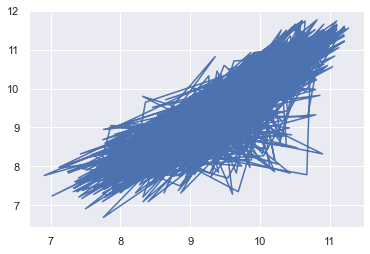

In [44]:
plt.plot(y_hat,y_train)

In [45]:
y_test_hat=reg.predict(x_test)

In [46]:
summary=pd.DataFrame(columns={'y_test_hat':y_test_hat,'y_test':y_test})

In [47]:
summary

,y_test_hat,y_test


In [48]:
y_test.shape

(774,)

In [49]:
summary['y_test_hat']=np.exp(y_test_hat)
y_test=y_test.reset_index(drop='True')
summary['y_test']=np.exp(y_test)

In [50]:
summary

,y_test_hat,y_test
0,10664.490908,2300.0
1,3511.761462,2800.0
2,7562.096575,2500.0
3,7490.664265,6400.0
4,11322.311977,9150.0
...,...,...
769,29647.165486,29500.0
770,10785.677929,9600.0
771,13961.404194,18300.0
772,27436.753316,68500.0


In [51]:
summary['df']=np.absolute(summary['y_test']-summary['y_test_hat'])


In [53]:
summary['df_rate']=summary['y_test']/summary['df']*100

In [54]:
summary

,y_test_hat,y_test,df,df_rate
0,10664.490908,2300.0,8364.490908,27.497191
1,3511.761462,2800.0,711.761462,393.390223
2,7562.096575,2500.0,5062.096575,49.386652
3,7490.664265,6400.0,1090.664265,586.798358
4,11322.311977,9150.0,2172.311977,421.210217
...,...,...,...,...
769,29647.165486,29500.0,147.165486,20045.460888
770,10785.677929,9600.0,1185.677929,809.663380
771,13961.404194,18300.0,4338.595806,421.795457
772,27436.753316,68500.0,41063.246684,166.815840
